## Preface



In [1]:
!pip install CFEDemands
import cfe

In [2]:
import pandas as pd

If need be&#x2026;



## Introduction



Here we give a set of generic instructions for analyzing demand for
food and nutrition.  Inputs include a datasets of consumption
quantities, consumption expenditures, household characteristics, and a
food conversion table.

The different datasets should be indexed as follows:


| Dataset|Indexed by|Columns|
|---|---|---|
| Expenditures|i,t,m|j|
| Consumption|i,t,m,u|j|
| Prices|j,u|t,m|
| HH Characteristics|i,t,m|k|
| FCT|j,u|n|
| RDI|n|k|

where `i` indexes households, `t` indexes periods, `m` indexes
markets, `j` indexes goods, `k` indexes different kinds of household
characteristics, `u` indexes different unit names, and `n` indexes
different nutrients.  Finally, any RDI (&ldquo;recommended daily intake&rdquo;)
tables should be indexed by nutrients, with columns corresponding to
characteristics of persons within the household (e.g., age & sex
categories).

Note that some countries have more than one dataframe of consumption,
distinguished by source; for example Malawi has consumption items
purchased as well as consumption items produced.  Here we focus on
consumption purchases, since one of our immediate aims is to infer
prices paid.



## Step 1: Acquire DataFrames



Here are addresses of google sheets for different dataframes for the
case of Uganda:



In [3]:
InputFiles = {'Expenditures':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','Expenditures (2019-20)'),
              'Prices':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','Prices'),
              'HH Characteristics':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','HH Characteristics'),
              'FCT':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','FCT'),
              'RDI':('1yVLriVpo7KGUXvR3hq_n53XpXlD5NmLaH1oOMZyV0gQ','RDI'),}

Note that in some cases not the food items for the FCT (e.g., for Niger) are **not** yet all matched up (&ldquo;harmonized&rdquo;) with food labels indexed by `j` in the expenditure,
consumption and price datasets.



In [4]:
# from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    df = read_sheets(key,sheet=sheet)
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

# Get expenditures...
x = pd.read_csv("data/uganda/Uganda - Expenditures (2019-20).csv")

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['i','t','m'])
x.columns.name = 'j'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

# Get HH characteristics...
z = pd.read_csv("data/uganda/Uganda - HH Characteristics.csv")

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['i','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

# Get prices
p = pd.read_csv("data/uganda/Uganda - Prices.csv")

if 'm' not in p.columns:  # Supply "market" indicator if missing
    p['m'] = 1

p = p.set_index(['t','m'])
p.columns.name = 'j'

p = p.apply(lambda x: pd.to_numeric(x,errors='coerce'))
p = p.replace(0,np.nan)

fct = pd.read_csv("data/uganda/Uganda - FCT.csv")

#### This bit peculiar to Niger FCT #####
#fct = fct.loc[fct.Code.str.len()==6]
#fct = fct.set_index('Code')
#fct.columns = [v.replace('\n',' ') for v in fct.columns]
########################################
fct = fct.set_index('j')
fct.columns.name = 'n'

fct = fct.apply(lambda x: pd.to_numeric(x,errors='coerce'))

################## RDI, if available (consider using US) #####################
rdi = pd.read_csv("data/uganda/Uganda - RDI.csv")
rdi = rdi.set_index('n')
rdi.columns.name = 'k'

In [5]:
p

j                       Beans   Beef         Beer  Biscuits   Bongo  \
t       m                                                             
2005-06 Central    650.000000   2500  3000.000000       NaN     NaN   
2005-6  Eastern    550.000000   2400  2000.000000       NaN     NaN   
        Northern   434.151414   2500  2400.000000       NaN     NaN   
        Western    500.000000   2200  2500.000000       NaN     NaN   
2009-10 Central   1350.000000   5000  4000.000000       NaN     NaN   
        Eastern   1200.000000   4000  2750.000000       NaN     NaN   
        Northern  1000.000000   4500  2600.000000       NaN     NaN   
        Western    975.000000   4000  3200.000000       NaN     NaN   
2010-11 Central   1650.000000   5500  4000.000000       NaN     NaN   
        Eastern   1300.000000   5000  2600.000000       NaN     NaN   
        Northern  1600.000000   5000  3000.000000       NaN     NaN   
        Western   1200.000000   5000  4000.000000       NaN     NaN   
2011-12 Central   1750.000000   7500  5000.000000       NaN     NaN   
        Eastern   1400.000000   6800  4228.571429       NaN     NaN   
        Northern  2000.000000   7000  3800.000000       NaN     NaN   
        Western   1250.000000   7000  4000.000000       NaN     NaN   
2013-14 Central   2000.000000   8000  5857.142857       NaN     NaN   
        Eastern   1750.000000   7000  4750.000000       NaN     NaN   
        Northern  2000.000000   7000  4000.000000       NaN     NaN   
        Western   1700.000000   7000  5000.000000       NaN     NaN   
2015-16 Central   2200.000000   9000  5833.333333       NaN     NaN   
        Eastern   2200.000000   8000  4200.000000       NaN     NaN   
        Northern  2000.000000   8000  4000.000000       NaN     NaN   
        Western   1800.000000   8000  6000.000000       NaN     NaN   
2018-19 Central   2100.000000  10000  5500.000000    2000.0  2000.0   
        Eastern   1900.000000   9000  5250.000000    3000.0  1000.0   
        Northern  5500.000000  10000  4300.000000    2000.0   800.0   
        Western   1750.000000  10000  6500.000000    2000.0  2000.0   
2019-20 Central   2500.000000  12000  6000.000000    5000.0  1000.0   
        Eastern   2275.000000  10000  6785.714286    2000.0  1000.0   
        Northern  8833.333333  10000  6500.000000    2000.0  1000.0   
        Western   2200.000000  10000  5000.000000    2000.0  1250.0   

j                       Bread  Butter, etc.     Cabbages         Cake  \
t       m                                                               
2005-06 Central   1400.000000   3000.000000  1400.000000          NaN   
2005-6  Eastern   1000.000000   3300.000000  1050.000000          NaN   
        Northern  1000.000000   1500.000000  1225.000000          NaN   
        Western   1000.000000   3000.000000  1050.000000          NaN   
2009-10 Central   2400.000000   4800.000000  1750.000000          NaN   
        Eastern   2000.000000   4400.000000  1750.000000          NaN   
        Northern  2000.000000   3000.000000  1750.000000          NaN   
        Western   2400.000000   4999.999863  1750.000000          NaN   
2010-11 Central   3571.428571   4545.454545  1341.514143          NaN   
        Eastern   2000.000000   4800.000000  1341.514143          NaN   
        Northern  2000.000000   5200.000000  1679.389313          NaN   
        Western   3428.571429   2500.000000  1341.514143          NaN   
2011-12 Central   4000.000000   8000.000000  1679.389313          NaN   
        Eastern   4000.000000   1000.000000  1679.389313          NaN   
        Northern  2000.000000   3500.000000  2142.857143          NaN   
        Western   3500.000000   3100.000000  1428.571429          NaN   
2013-14 Central   3500.000000   6538.461538  1796.202757          NaN   
        Eastern   3500.000000   7000.000000  1428.571429          NaN   
        Northern  2000.000000   5230.769231  2142.857143          NaN   
        Western   3500.000000   6000.000000  1878.11

## Step 2: Estimate Demand System



Here, use data on log *expenditures* and household characteristics to
create a CFEDemand `Regression` result.



In [6]:
import cfe

result = cfe.Regression(y=np.log(x.stack()),d=z)

result.get_beta().sort_values(ascending=False) # Check sanity...

j
Fish (fresh)      0.886778
Milk (fresh)      0.834115
Biscuits          0.781522
Oranges           0.756571
Sorghum           0.686320
Bread             0.677132
Other Fruits      0.658992
Chapati           0.634176
Sweet Bananas     0.591652
Soda              0.586076
Other Veg.        0.585797
Sim Sim           0.563487
Rice              0.531964
Tomatoes          0.488395
Goat              0.467223
Mangos            0.463788
Fish (dried)      0.446381
Matoke            0.443616
Ground Nuts       0.426204
Beef              0.423841
Pork              0.422006
Tea               0.421568
Cooking Oil       0.416759
Maize             0.406007
Cabbages          0.403810
Waragi            0.401824
Dodo              0.369812
Millet            0.360086
Eggs              0.345383
Onions            0.340940
Sweet Potatoes    0.325598
Beans             0.316913
Peas              0.277380
Salt              0.145142
Cassava           0.142661
Name: beta, dtype: float64

Make this persistent&#x2026;



In [7]:
result.to_pickle('./foo.pickle')

## Step 3: Infer quantities



Next, we divide predicted expenditures by prices to get
quantities (in kilograms) we can map into the  FCT.



In [8]:
import cfe

result = cfe.read_pickle('foo.pickle')  # Get persistent result saved above...

xhat = result.predicted_expenditures()

# Expenditures divided by prices/kg gives quantities in kgs...
qhat = (xhat.unstack('j')/p).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

Note that `qhat` may give prices for different *units*.  If prices
differ **only** because of units (e.g., one deciliter costs one
tenth as much as a liter), then we can use these differences in prices
to convert between different units, even if the units (e.g., &ldquo;basket&rdquo;)
is otherwise unclear.  

If we have enough data on purchases in kilograms, just keep those
prices (otherwise choose some other useful unit).  We also assume
prices are the same for everyone, so just take median.



## Step 4: Map predicted quantities into nutrients



Before this will work, need columns of qhat to match columns of fct.



In [9]:
use = fct.index.intersection(qhat.columns)


nutrients = qhat[use]@fct.loc[use,:]
nutrients.mean()    # NB: Nutrients are for past /week/ for entire household. (Depends on dataset)

n
Energy          54394.359147
Protein          1543.135088
Fiber             719.013180
Folate          11133.452311
Calcium         17461.844887
Carbohydrate     7168.395869
Iron              423.974692
Niacin            431.775192
Riboflavin         38.594788
Thiamin            45.800022
Vitamin A        9683.206362
Vitamin B-12       60.013724
Vitamin B-6        51.591940
Vitamin C        5136.327910
Zinc              238.093310
dtype: float64

## Household Nutritional Adequacy



Our data on demand and nutrients is at the *household* level; we
   can&rsquo;t directly compare household level nutrition with individual
   level requirements.  What we **can** do is add up minimum individual
   requirements, and see whether household total exceed these.  This
   isn&rsquo;t a guarantee that all individuals have adequate nutrition
   (since the way food is allocated in the household might be quite
   unequal, or unrelated to individual requirements), but it is
   *necessary* if all individuals are to have adequate nutrition.

For each household, we know the numbers of people in different age-sex categories.  We can match these up with data from an RDI (Recommended Dietary Intakes), then sum over different types.



In [10]:
z = z[rdi.columns.tolist()]

hh_rdi = z@rdi.T

# Uganda data is per week, so make this a recommended WEEKLY intake:
hh_rwi = hh_rdi*7

Now, what proportion of `hh_rwi` do households consume?



In [11]:
# Match up nutrient names
use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

nutrient_ratio

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_44250/2649532435.py:4: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()


n                                                   Energy   Protein  \
t       m       i                                                      
2019-20 Central 1013000201                        5.134721  5.098043   
                1013000202                        0.743429  1.081666   
                1013000204                        4.786251  5.222721   
                1021000108                        1.048122  1.058477   
                1021000109                        1.053957  1.205457   
...                                                    ...       ...   
        Western _62                               1.152294  1.656353   
                _67                               1.689057  2.300784   
                a98bebba177243668464e31f6d2bb92d  0.744737  1.027948   
                acb16f9b068549d8a80a37c9d638742f  0.608204  0.922646   
                d10a687889de469687377204195f3db0  0.658082  0.839498   

n                                                    Fiber    Folate  \
t       m       i                                                      
2019-20 Central 1013000201                        4.132305  3.873524   
                1013000202                        0.574476  0.776345   
                1013000204                        3.727186  4.596746   
                1021000108                        0.832093  0.912693   
                1021000109                        0.816208  0.960476   
...                                                    ...       ...   
        Western _62                               1.104845  1.316812   
                _67                               1.605007  2.031695   
                a98bebba177243668464e31f6d2bb92d  0.845978  0.853436   
                acb16f9b068549d8a80a37c9d638742f  0.610917  0.749131   
                d10a687889de469687377204195f3db0  0.670625  0.776954   

n                                                  Calcium  Carbohydrate  \
t       m       i                                                          
2019-20 Central 1013000201                        2.226907      7.438462   
                1013000202                        0.292498      0.783963   
                1013000204                        3.365932      9.615253   
                1021000108                        0.517780      1.474234   
                1021000109                        0.614087      1.746385   
...                                                    ...           ...   
        Western _62                               0.591646      2.271452   
                _67                               1.078246      4.454679   
                a98bebba177243668464e31f6d2bb92d  0.321050      1.646947   
                acb16f9b068549d8a80a37c9d638742f  0.271748      1.070940   
                d10a687889de469687377204195f3db0  0.320558      1.367045   

n                                                     Iron    Niacin  \
t       m       i                                                      
2019-20 Central 1013000201                        7.580828  4.557005   
                1013000202                        0.761054  0.761700   
                1013000204                        9.462395  5.024994   
                1021000108                        1.625111  0.928337   
                1021000109                        0.926896  1.084897   
...                                                    ...       ...   
        Western _62                               1.473452  1.473380   
                _67                               4.082491  2.215240   
                a98bebba177243668464e31f6d2bb92d  0.997279  0.960913   
                acb16f9b068549d8a80a37c9d638742f  0.718197  0.778769   
                d10a687889de469687377204195f3db0  1.163394  0.776283   

n                                                 Riboflavin   Thiamin  \
t       m       i                                                        
2019-20 Central 1013000201                          

Graph ratios of adequacy for particular nutrients



<Axes: >

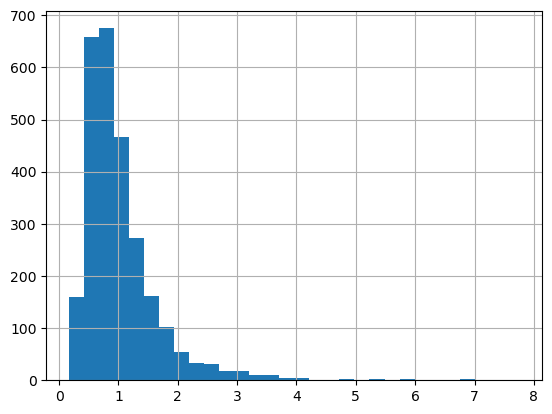

In [12]:
%matplotlib inline
nutrient_ratio['Energy'].hist(bins=30)